In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = './data'
# read the excel dataset
data =  pd.read_excel("./data/GEFCom2014-E.xlsx", parse_date='Date')
# put in the imestamp new column the time equaly split by hour
data['timestamp'] = data['Date'].add(pd.to_timedelta(data.Hour - 1, unit='h'))
# select the tree features
data = data[['timestamp', 'load', 'T']]
# rename temperature column
data = data.rename(columns={'T':'temp'})
# remove time period with no load data
data = data[data.timestamp >= '2012-01-01'
# save to csv
data.to_csv(os.path.join(data_dir, 'energy.csv'), index=False)

In [30]:
# load the csv file
energy = pd.read_csv(os.path.join(data_dir, 'energy.csv'), parse_dates=['timestamp'])
# make the timestamp the index
energy.index = energy['timestamp']
# split the timestamp as hour equaly sets
energy = energy.reindex(pd.date_range(min(energy['timestamp']),
                                          max(energy['timestamp']),
                                          freq='H'))
# drop the timestamp column
energy = energy.drop('timestamp', axis=1)

#select only load column
energy = energy['load']
# transform it to dataframe
energy = energy.to_frame()

In [46]:
energy.head()

,load
2012-01-01 00:00:00,2698.0
2012-01-01 01:00:00,2558.0
2012-01-01 02:00:00,2444.0
2012-01-01 03:00:00,2402.0
2012-01-01 04:00:00,2403.0


-  Plot data

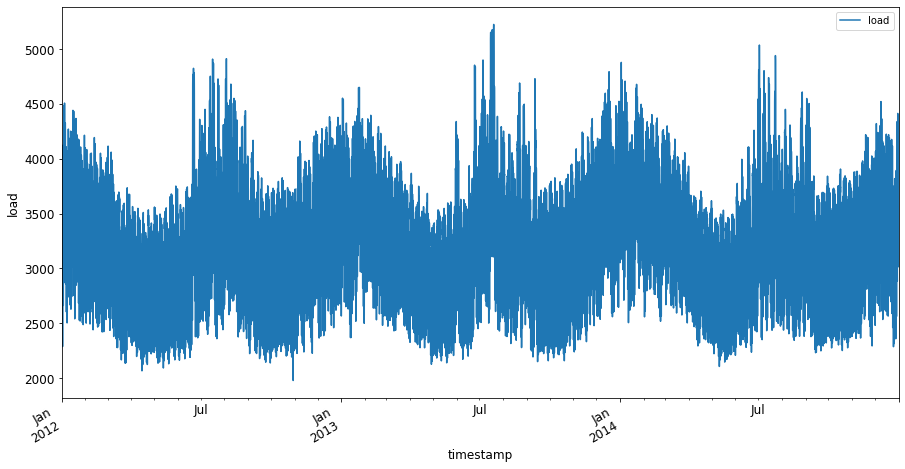

In [47]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

- Plot data for 2014 year

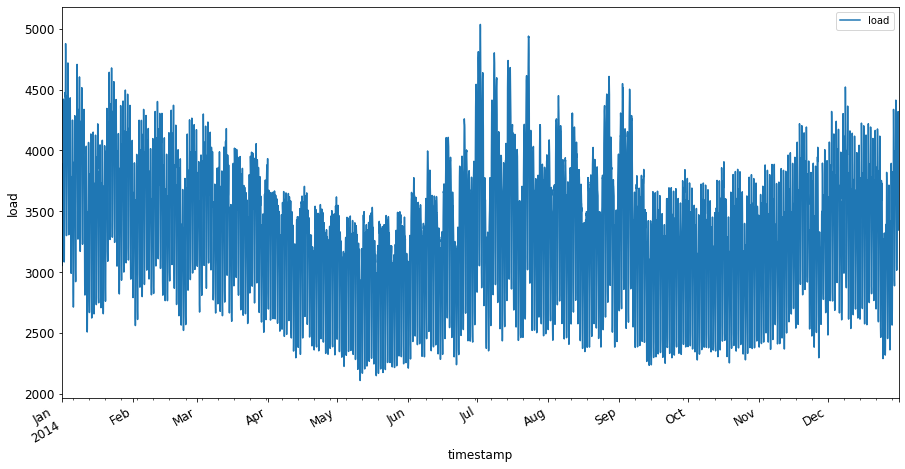

In [52]:
energy['2014-01-01':'2014-12-31'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

- Plot first week of July 2014

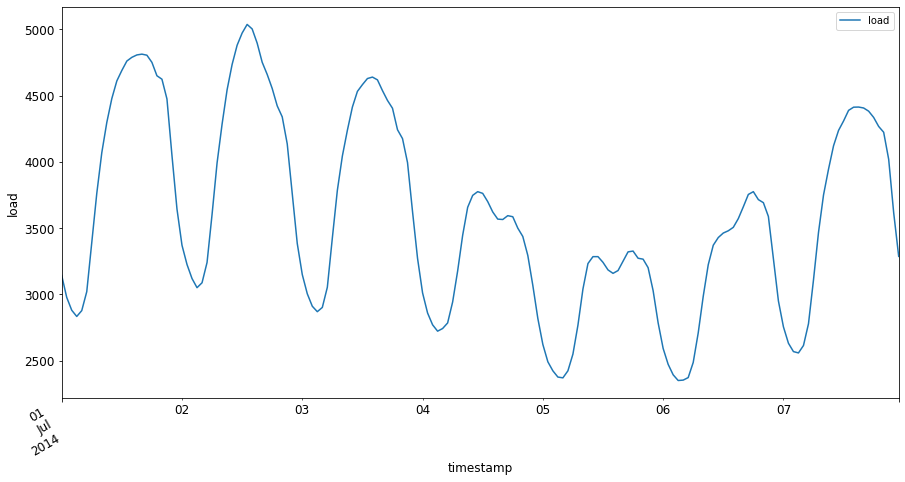

In [55]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [27]:
data_dir

'./data'

In [25]:
data

,timestamp,load,temp
70128,2012-01-01 00:00:00,2698.0,32.000000
70129,2012-01-01 01:00:00,2558.0,32.666667
70130,2012-01-01 02:00:00,2444.0,30.000000
70131,2012-01-01 03:00:00,2402.0,31.000000
70132,2012-01-01 04:00:00,2403.0,32.000000
...,...,...,...
96427,2014-12-31 19:00:00,4012.0,18.000000
96428,2014-12-31 20:00:00,3856.0,16.666667
96429,2014-12-31 21:00:00,3671.0,17.000000
96430,2014-12-31 22:00:00,3499.0,15.333333


In [9]:
# Load the data into a DataFrame
spreadsheet = excel_file.parse('Hourly')

In [10]:
print(spreadsheet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    96432 non-null  datetime64[ns]
 1   Hour    96432 non-null  int64         
 2   load    78888 non-null  float64       
 3   T       96432 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 MB
None


In [15]:
spreadsheet[['Date','load']].iloc[600:700]

,Date,load
600,2004-01-26,NaN
601,2004-01-26,NaN
602,2004-01-26,NaN
603,2004-01-26,NaN
604,2004-01-26,NaN
...,...,...
695,2004-01-29,NaN
696,2004-01-30,NaN
697,2004-01-30,NaN
698,2004-01-30,NaN
